<a href="https://colab.research.google.com/github/Emma-Ok/MonitoriasLogica2_2024-2/blob/main/Parcial_2_Recursion.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Repaso parcial 2 acerca de recursion.

*Universidad de antioquia 2024-2*

1. 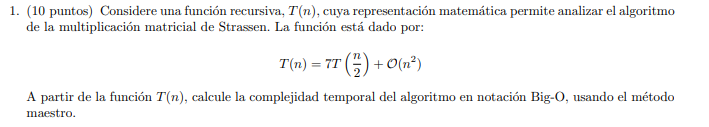

Lambda = 7
Beta = 2
Alpha = 2

Log2(7)= 2.80

Complejidad Temporal en notacion BigO = O(n**2.80)

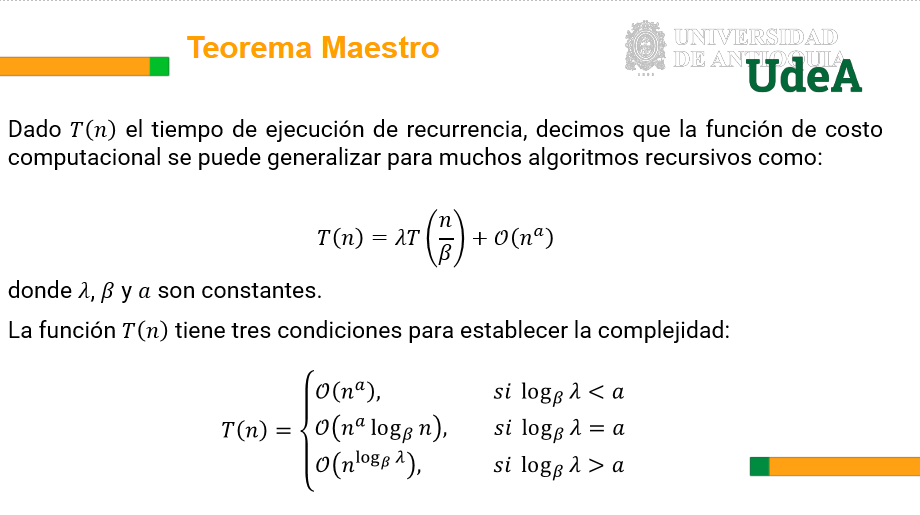

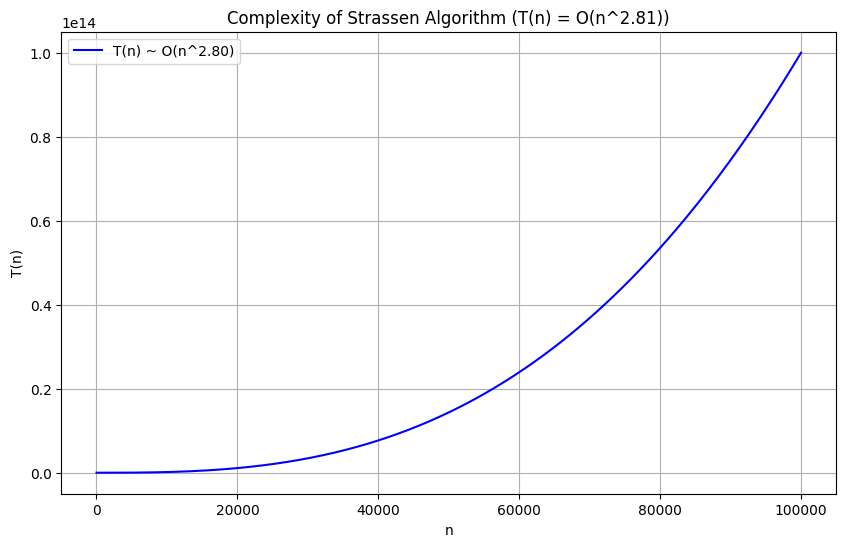

In [52]:
import numpy as np
import matplotlib.pyplot as plt


def strassen_complexity(n):
    return n**2.80

# Generate some data to visualize the growth
n_values = np.linspace(1, 100000,400)
strassen_times = [strassen_complexity(n) for n in n_values]

# Plotting the complexity
plt.figure(figsize=(10, 6))
plt.plot(n_values, strassen_times, label='T(n) ~ O(n^2.80)', color='b')
plt.title('Complexity of Strassen Algorithm (T(n) = O(n^2.81))')
plt.xlabel('n')
plt.ylabel('T(n)')
plt.legend()
plt.grid(True)
plt.show()


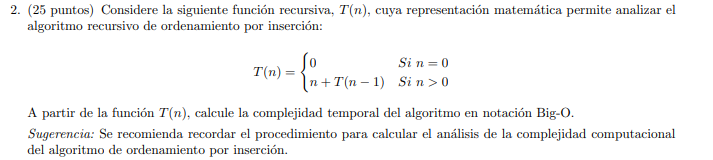

T(n) = n + T(n-1)
<br/>
T(n) = n + (n-1)
<br/>
T(n) = n + (n-1) + (n-2) ... 1
<br/>
T(n) = n + (n-1) + (n-2)... T(n-3)
<br/>
"Sumar todos n consecutivos, desde 1 hasta n"
<br/>
S = ( n_terminos / 2 ) * ( primer termino + ultimo termino )
<br/>
primer = 1
<br/>
ultimo = n
<br/>
T(n) = (n/2) * (1+n) = (n(n+1)/2)
<br/>
Complejidad computacion en notición Big O =(n**2)


In [59]:
import matplotlib.pyplot as plt
import numpy as np

# Función recursiva de T(n) para ordenamiento por inserción
def T(n):
    if n == 0:
        return 0
    else:
        return n + T(n-1)

# Generar valores de n
n_values = np.arange(1, 1000)

# Calcular T(n) para cada valor de n
T_values = [T(n) for n in n_values]

# Graficar T(n) frente a n
plt.figure(figsize=(10, 6))
plt.plot(n_values, T_values, linestyle='-', color='b', label='T(n)')
plt.title("T(n) = n + T(n-1): Complejidad Recursiva de Ordenamiento por Inserción")
plt.xlabel("n")
plt.ylabel("T(n)")
plt.grid(True)
plt.legend()

# Mostrar la gráfica
plt.show()


RecursionError: maximum recursion depth exceeded in comparison

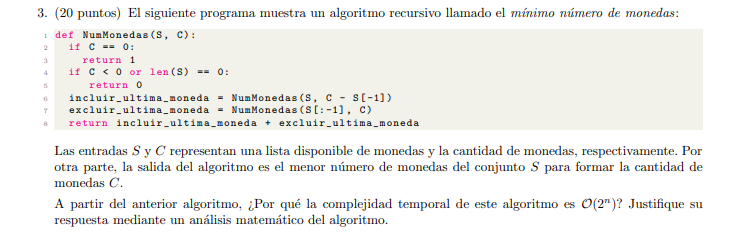

T(C,n) = T(C-S[n-1], n) + T(C,n-1)
<br/>
"Expandiendo la formula"
<br/>
T(C-S[n-1],n) = T((C-S[n-1])- S[n-1], n) + T(C-S[n-1], n-1)
<br/>
"Sustituir"
<br/>
T(C,n) = T(C - 2S[n-1],n) + T(C-S[n-1], n-1)
<br/>
T(C,n) = 2T(C-S[n-1],n) = 2T(C,n-1)
<br/>
"Caso base"
<br/>
n-k = 0
k = n
<br/>
Expresar como:
T(C,n) = 2^k T(C-k)
<br/>
Finalmente se expresa como
<br/>
T(n) =2^n * T(0)
<br/>
T(n) = 2^n + 1
<br/>
Notación BigO para representar el algoritmo es de O(2^n)







In [61]:
def NumMonedas(S, C):
    if C == 0:
        return 1
    if C < 0 or len(S) == 0:
        return 0

    incluir_ultima_moneda = NumMonedas(S, C - S[-1])
    excluir_ultima_moneda = NumMonedas(S[:-1], C)

    return incluir_ultima_moneda + excluir_ultima_moneda

# Caso de prueba
if __name__ == "__main__":
    S = [1, 2, 5]
    C = 10
    print(f"Cantidad de combinaciones para formar {C} con {S}: {NumMonedas(S, C)}")

Cantidad de combinaciones para formar 10 con [1, 2, 5]: 10


Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
graphviz is already the newest version (2.42.2-6ubuntu0.1).
0 upgraded, 0 newly installed, 0 to remove and 49 not upgraded.


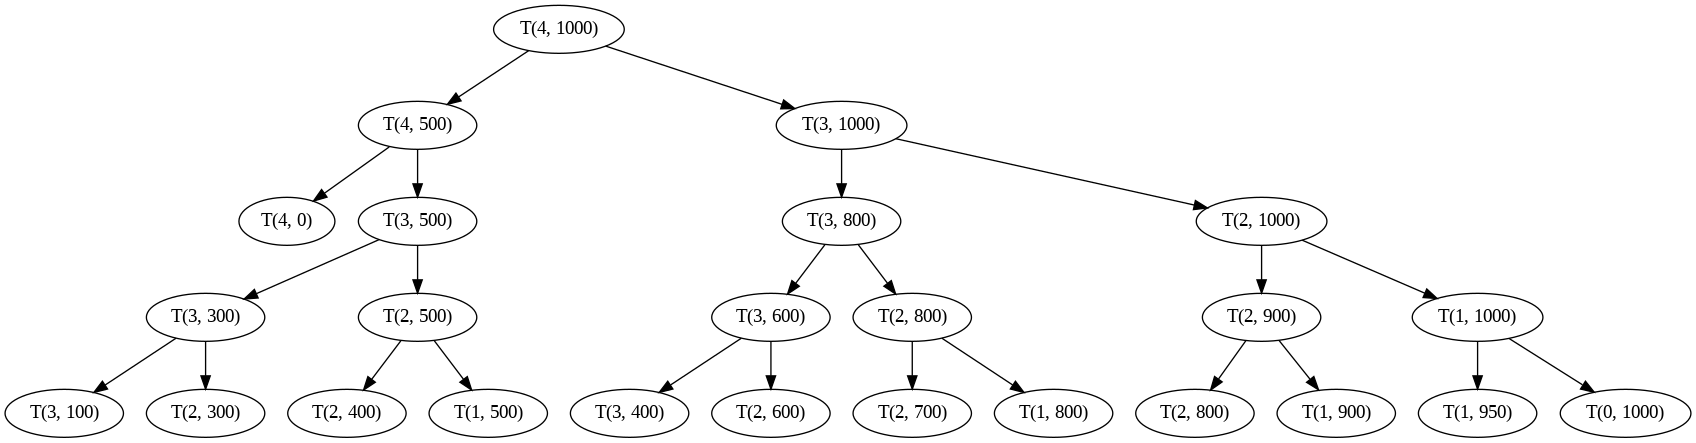

In [62]:
# Instalar graphviz y pydot en Colab
!apt-get install graphviz -y
!pip install graphviz pydot

import graphviz

# Inicializamos el grafo como un objeto de Graphviz
dot = graphviz.Digraph()

# Variable para llevar el número de llamadas
call_count = 0
max_depth = 4  # Limitar la profundidad del árbol

# Algoritmo modificado para graficar el árbol
def NumMonedas(S, C, parent=None, depth=0):
    global call_count
    if depth > max_depth:
        return 0  # Limitar la profundidad

    global call_count
    call_count += 1
    node_id = call_count
    dot.node(str(node_id), f'T({len(S)}, {C})')  # Agregar nodo

    if parent is not None:
        dot.edge(str(parent), str(node_id))  # Conectar al nodo padre

    if C == 0:  # Caso base
        return 1
    if C < 0 or len(S) == 0:  # Caso sin solución
        return 0

    # Llamadas recursivas
    incluir_ultima_moneda = NumMonedas(S, C - S[-1], node_id, depth + 1)  # Incluir última moneda
    excluir_ultima_moneda = NumMonedas(S[:-1], C, node_id, depth + 1)  # Excluir última moneda

    return incluir_ultima_moneda + excluir_ultima_moneda

# Definimos un conjunto general de monedas y la cantidad objetivo
monedas = [50, 100, 200, 500]  # Conjunto general
C_target = 1000  # Cantidad objetivo

# Llamamos a la función
NumMonedas(monedas, C_target)

# Renderizar el árbol y mostrarlo
dot.render('/content/arbol_monedas', format='png', cleanup=True)

# Mostrar el árbol en Colab
from IPython.display import Image
Image('/content/arbol_monedas.png')


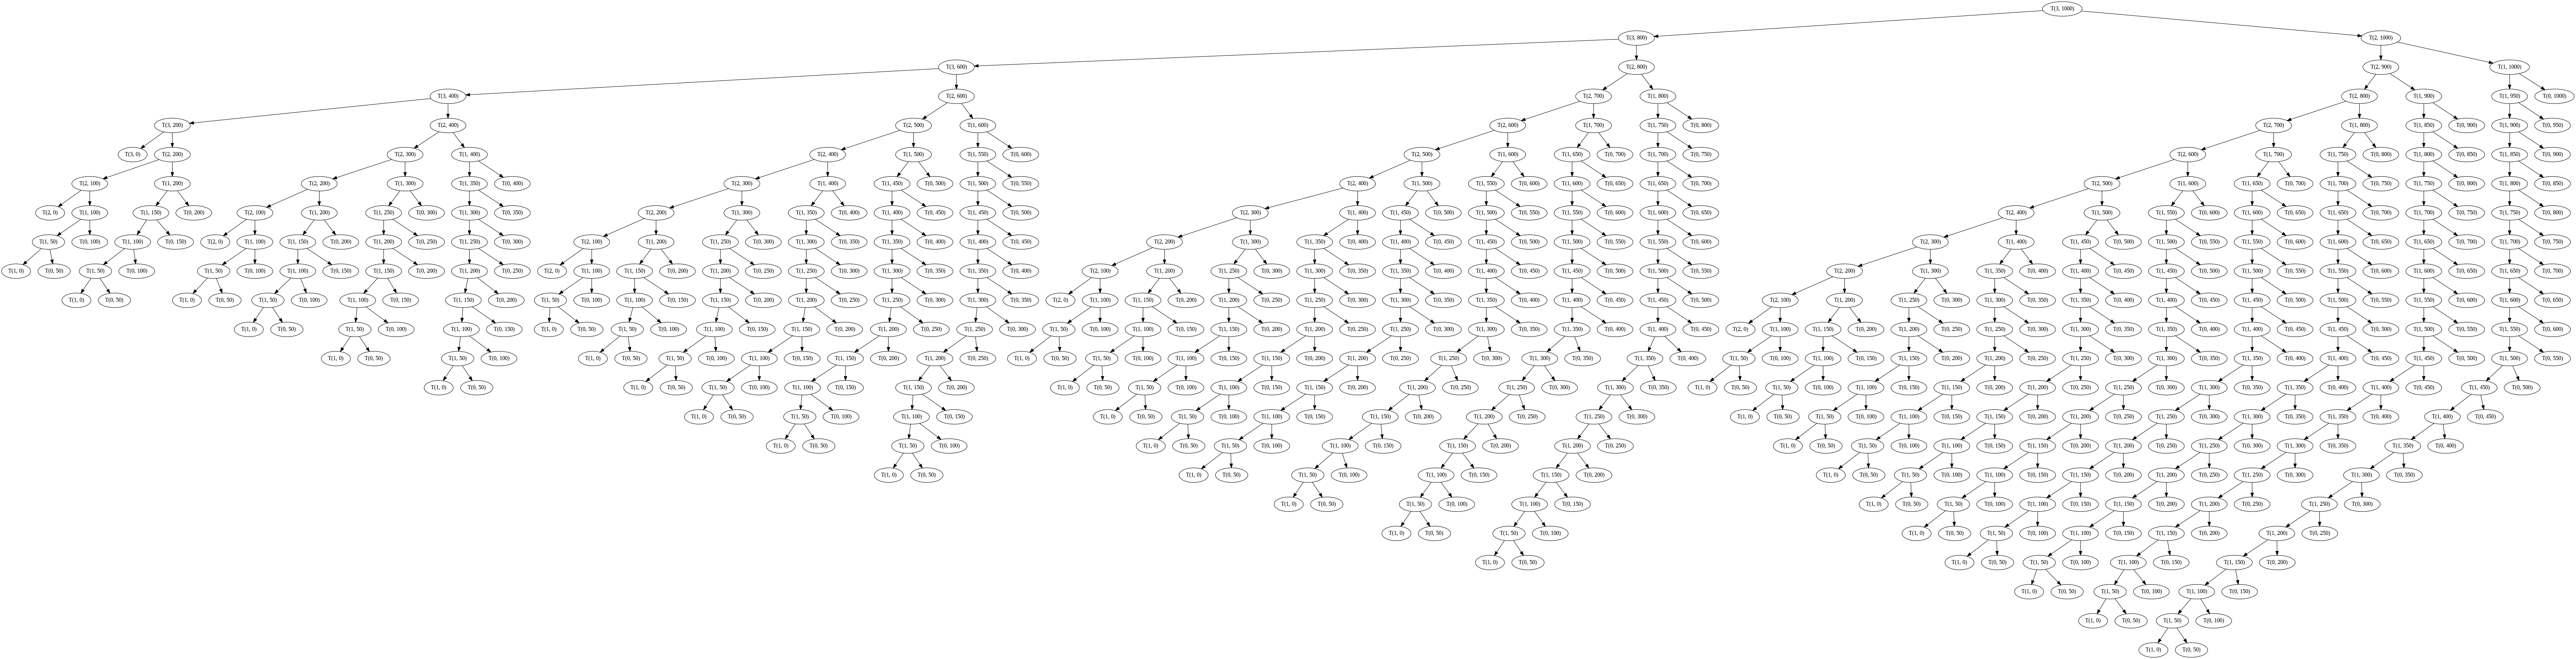

In [63]:

import graphviz

# Inicializamos el grafo como un objeto de Graphviz
dot = graphviz.Digraph()

# Variable para llevar el número de llamadas
call_count = 0

# Algoritmo modificado para graficar el árbol sin limitación de profundidad
def NumMonedas(S, C, parent=None):
    global call_count
    call_count += 1
    node_id = call_count
    dot.node(str(node_id), f'T({len(S)}, {C})')  # Agregar nodo

    if parent is not None:
        dot.edge(str(parent), str(node_id))  # Conectar al nodo padre

    if C == 0:  # Caso base
        return 1
    if C < 0 or len(S) == 0:  # Caso sin solución
        return 0

    # Llamadas recursivas
    incluir_ultima_moneda = NumMonedas(S, C - S[-1], node_id)  # Incluir última moneda
    excluir_ultima_moneda = NumMonedas(S[:-1], C, node_id)  # Excluir última moneda

    return incluir_ultima_moneda + excluir_ultima_moneda

# Definimos un conjunto general de monedas y la cantidad objetivo
monedas = [50, 100, 200]  # Conjunto general
C_target = 1000  # Cantidad objetivo

# Llamamos a la función
NumMonedas(monedas, C_target)

# Renderizar el árbol y mostrarlo
dot.render('/content/arbol_monedas_sin_limite', format='png', cleanup=True)

# Mostrar el árbol en Colab
from IPython.display import Image
Image('/content/arbol_monedas_sin_limite.png')

# 4
Escriba un algoritmo recursivo que imprima las 2**n
 posibles combinaciones de n variables
lógicas.

In [67]:
def combinaciones_logicas(V, i, n):
    if i > n:
        print(V)
    else:
       combinaciones_logicas(V[:], i+1, n) # Mantener el valor actual de V[i]
       V[i] = not V[i] # Invertir el valor
       combinaciones_logicas(V[:], i+1, n) # generamos las combinaciones del valor cambiado de V[i]

def generar_combinaciones(n):
    V = [True] * n
    combinaciones_logicas(V, 0, n-1)

generar_combinaciones(3)

[True, True, True]
[True, True, False]
[True, False, True]
[True, False, False]
[False, True, True]
[False, True, False]
[False, False, True]
[False, False, False]


In [46]:

def merge(x, T, F, M, p):
    k, i, j = F, F, M + 1
    while (i <= M) and (j <= p):
        if x[i] <= x[j]:
            T[k] = x[i]
            i += 1
        else:
            T[k] = x[j]
            j += 1
        k += 1
    while (i <= M):
        T[k] = x[i]
        k += 1
        i += 1
    for i in range(F, p + 1):
        x[i] = T[i]

def MergeSortIterativo(x):
    L = 0
    R = len(x) - 1
    T = x.copy()
    m = 1
    while m <= (R - L):
        for i in range(L, R, 2 * m):
            F = i
            M = i + m - 1
            p = min(i + 2 * m - 1, R)
            merge(x, T, F, M, p)
        m = 2 * m
    return x

# Caso de prueba
if __name__ == "__main__":
    arr = [38, 27, 43, 3, 9, 82, 10]
    print("Arreglo original:", arr)
    sorted_arr = MergeSortIterativo(arr)
    print("Arreglo ordenado:", sorted_arr)

Arreglo original: [38, 27, 43, 3, 9, 82, 10]
Arreglo ordenado: [3, 9, 10, 27, 38, 43, 82]
